In [2]:
%load_ext autoreload
%autoreload 2
    
import pymongo
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from Openseas_Methods import *
from pycoingecko import CoinGeckoAPI
from datetime import datetime,timedelta
import numpy as np
from scipy.stats import pearsonr
import pickle
import decision_tree as tree

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
client = MongoClient()
db = client.NFTDB
collection_data = db.salesCollection
stats_collection = db.NFTStats
slug_collection = db.completedSlugs
skip_list=['ens','base-introduced','fundrop-pass','gemesis','apecoin','dai-stablecoin','uniswap','1inch-token']

In [150]:
stats_collection.find_one({'total_volume':{"$gt": 20000}})
stats_collection.count_documents({'total_volume':{"$gt": 20000}})

121

In [14]:
def db_date_to_geck(date):
    dt = datetime.strptime(date,'%Y-%m-%dT%H:%M:%S')
    geck_dat = f"{dt.day}-{dt.month}-{dt.year}"
    return geck_dat

In [4]:
with open('date_to_price.pkl','rb') as f:
   date_to_price = pickle.load(f)

In [10]:
StartDate = "01/10/23"
Date = datetime.strptime(StartDate, "%d/%m/%y")
dates = [Date+timedelta(days=x) for x in range(0,(30))]
geck_dates = [f"{dt.day}-{dt.month}-{dt.year}" for dt in dates]
# date_to_price = {}
gek = CoinGeckoAPI()
for date in tqdm(geck_dates):
    date_to_price[date] = gek.get_coin_history_by_id('ethereum', date=date)['market_data']['current_price']['usd']

 33%|██████████████████████████████████████████▋                                                                                     | 10/30 [00:01<00:03,  5.57it/s]


KeyError: 'market_data'

In [11]:
print(len(date_to_price))

1227


In [12]:
with open('date_to_price.pkl','wb') as f:
    pickle.dump(date_to_price,f)

In [12]:
import pymongo
print(collection_data.find_one({}))
collection_data.create_index('slug')

{'_id': '0x53194272a87154c17130d2b466b3c7ce432051388d0033ec4ac9c09d4464aa49', 'auction_type': None, 'buyer_address': '0xd3f5ee617d302fb17a5cf7fdb749fa638bc9ddcc', 'buyer_username': None, 'event_type': 'successful', 'is_bundle': False, 'payment_token': 'ETH', 'seller_address': '0x4fb1136a1122b2312089b0a7ba2111866a6f7b59', 'seller_username': 'BadgerBot', 'slug': 'atsnft', 'timestamp': '2023-09-02T22:02:23', 'token_id': '129', 'total_price': 0.7247, 'usd_price': 1636.34}


'slug_1'

In [142]:
with open('milady_slugs.pkl', 'rb') as f:
    milady_slugs = pickle.load(f)

In [17]:
df = pd.DataFrame.from_dict(flat_features, orient='index') 

In [7]:
print(len(date_to_price))

1225


In [140]:
milady_slugs = ['milady','janklerz', 'very-internet-poster', 'killady', 'roritamakers1e2', 'goulerbros', 'mifairy-maker', 'reptilianbabies', 'banners-nft', 'slavbro-wee-bring-v2', 'milady-2-global-terror', 'remembrance-banners', 'reservoir-dog', 'miladystation', 'remilio-babies', 'radbro-webring', 'sneedmaker', 'desktops-nft', 'mog-auras', 'sonoramaker', 'miladystationclassic', 'loveposters', 'hurt-hapas', 'brg-music-group', 'tlgame', 'micent-van-gogh', 'veryinternetperson', 'matrix-milady', 'water-mililys', 'meltydiary', 'pixeladymaker', 'conspiracy-lady-maker', 'ultraviolence-kibbles', 'molady', 'oekakimaker', 'meowlady-maker', 'pemuto', 'pixeladymaker-bc']

In [63]:
milady_dates = [datetime.strptime(x['timestamp'],'%Y-%m-%dT%H:%M:%S') for x in milady_data]
print(len(milady_dates))
milady_geck_dates = [f"{x.day}-{x.month}-{x.year}" for x in milady_dates]
milady_geck_set = set(milady_geck_dates)
print(len(milady_geck_set))
date_to_price = {}
gek = CoinGeckoAPI()
for date in tqdm(milady_geck_set):
    date_to_price[date] = gek.get_coin_history_by_id('ethereum', date=date)['market_data']['current_price']['usd']


16644
265


100%|█████████████████████████████████████████| 265/265 [24:02<00:00,  5.44s/it]


In [107]:
nak_dates = [datetime.strptime(x['timestamp'],'%Y-%m-%dT%H:%M:%S') for x in nak_data]
print(len(nak_dates))
nak_geck_dates = [f"{x.day}-{x.month}-{x.year}" for x in nak_dates]
nak_geck_set = set(nak_geck_dates)
print(len(nak_geck_set))
new_dates = [x for x in nak_geck_set if x not in milady_geck_set]
print(len(new_dates))
# date_to_price = {}
# gek = CoinGeckoAPI()
# for date in tqdm(milady_geck_set):
#     date_to_price[date] = gek.get_coin_history_by_id('ethereum', date=date)['market_data']['current_price']['usd']

68647
167
0


In [7]:
with open('combo_per.pkl','rb') as f:
    combo_perc = pickle.load(f)
G = make_nft_graph(list(combo_perc.items()),skip_list=skip_list)
top_edges = {}
for node in G.nodes():
    neighbors = G.edges(node, data=True)
    sorted_edges = sorted(neighbors, key=lambda x: x[2]['weight'], reverse=True)[:20]
    top_edges[node] = sorted_edges
print(top_edges['milady'])

[('milady', 'banners-nft', {'weight': 0.3981358189081225}), ('milady', 'shiro-oh-i-see', {'weight': 0.39520958083832336}), ('milady', 'desktops-nft', {'weight': 0.3371824480369515}), ('milady', 'sonoramaker', {'weight': 0.3360323886639676}), ('milady', 'meltydiary', {'weight': 0.3248730964467005}), ('milady', 'tlgame', {'weight': 0.32222222222222224}), ('milady', 'pixeladymaker-bc', {'weight': 0.3102310231023102}), ('milady', 'water-mililys', {'weight': 0.3058823529411765}), ('milady', 'brg-music-group', {'weight': 0.2891566265060241}), ('milady', 'remilio-babies', {'weight': 0.27478403948992186}), ('milady', 'hurt-hapas', {'weight': 0.2658486707566462}), ('milady', 'loveposters', {'weight': 0.2608695652173913}), ('milady', 'godsremix', {'weight': 0.25806451612903225}), ('milady', 'yayo-nft', {'weight': 0.256198347107438}), ('milady', 'matrix-milady', {'weight': 0.2488479262672811}), ('milady', 'miladystation', {'weight': 0.2463768115942029}), ('milady', 'neko-maker', {'weight': 0.2391

In [ ]:
features = tree.compute_graph_features(combo_perc,skip_list=skip_list)

Computing Average Edge Weights
Done Computing Average Edge Weights
Computing Centrality metrics
Done Computing Centrality metrics
Computing Community


In [16]:
with open('graph_features.pkl','wb') as f:
    pickle.dump(features,f)

In [20]:
df

,average_edge_weight_25,eigen_centrality,clustering_coeff,community_size,community_edge_size,community_average_edge_weight,CC_size_0.1,CC_edge_size_0.1,CC_average_edge_weight_0.1,CC_size_0.15000000000000002,...,CC_average_edge_weight_0.6000000000000002,CC_size_0.6500000000000001,CC_edge_size_0.6500000000000001,CC_average_edge_weight_0.6500000000000001,CC_size_0.7000000000000002,CC_edge_size_0.7000000000000002,CC_average_edge_weight_0.7000000000000002,CC_size_0.7500000000000002,CC_edge_size_0.7500000000000002,CC_average_edge_weight_0.7500000000000002
azukielementals,0.156842,1.274280e-04,0.014094,4777,121099,0.046253,3781.0,50455.0,0.053182,2252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uniswap-v3-positions,0.110187,8.661593e-04,0.002768,4777,121099,0.046253,3781.0,50455.0,0.053182,2252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sproto-gremlins,0.094732,1.264946e-05,0.051791,118,2779,0.205875,3781.0,50455.0,0.053182,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
projectkaito,0.021092,4.402248e-05,0.026136,4777,121099,0.046253,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
projectyinyang,0.028990,1.743082e-04,0.015772,4777,121099,0.046253,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tribo-flameys,0.097104,3.439779e-06,0.000000,4777,121099,0.046253,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drawn-apart,0.188854,9.098886e-06,0.000000,4777,121099,0.046253,3781.0,50455.0,0.053182,2252.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ryokoclub,0.020566,4.743930e-07,0.000000,1732,308697,0.056471,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nakamigods,0.059510,2.796441e-05,0.000000,1732,308697,0.056471,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# slug_records = stats_collection.find({'total_volume':{"$gt": 20000}})
# slugs = [x['slug'] for x in list(slug_records)]
slug_records = slug_collection.find({})
slugs = [x['_id'] for x in list(slug_records)]
slug_n_weights = []

for slug in slugs:
    try:
        weights= [x[2]['weight'] for x in top_edges[slug]]
        slug_n_weights.append((slug,sum(weights)/len(weights)))
    except:
        continue


In [45]:
import random
x = []
y = []
for slug,weight in slug_n_weights:
    milady_data = list(collection_data.find({'slug':slug,'timestamp':{'$regex':'2023'}}))
    # print(slug,len(milady_data))
    if len(milady_data)<10:
        continue
    milady_sale_prices = [x['total_price']*date_to_price[db_date_to_geck(x['timestamp'])] for x in milady_data if x['timestamp']]
    milady_eth_prices = [date_to_price[db_date_to_geck(x['timestamp'])] for x in milady_data if x['timestamp']]
    p = milady_eth_prices
    q = milady_sale_prices
    # if slug == 'aopanda-party':
    #     plt.plot(np.unique(p), np.poly1d(np.polyfit(p, q, 1))(np.unique(p)))
    #     plt.scatter(p,q)
    corr = pearsonr(p,q)
    if corr.pvalue>0.05:
        continue
    x.append(weight)
    y.append(corr.statistic)
    print(slug)
    print(corr)


atsnft
PearsonRResult(statistic=0.24015809656080342, pvalue=2.969841584803989e-26)
opepen-edition
PearsonRResult(statistic=0.23699784390099732, pvalue=0.0)
lazy-lions
PearsonRResult(statistic=-0.13692171702122535, pvalue=1.719007492177364e-14)
parallelalpha
PearsonRResult(statistic=0.05098080114847272, pvalue=1.3394040202610608e-14)
qql-mint-pass
PearsonRResult(statistic=-0.17816437565176801, pvalue=0.005542259871345248)
vv-checks
PearsonRResult(statistic=0.3468104366518368, pvalue=0.0)
genkai
PearsonRResult(statistic=-0.08183662333958305, pvalue=0.004873049487612994)
valhalla
PearsonRResult(statistic=-0.15183502577370903, pvalue=3.038245737915832e-44)
crypto-phunks
PearsonRResult(statistic=0.1338994601034677, pvalue=1.177769600687175e-15)
terraforms
PearsonRResult(statistic=-0.12097875718998384, pvalue=3.653428922185462e-14)
0n1-force
PearsonRResult(statistic=0.126004934415847, pvalue=1.798554932367069e-49)
renga
PearsonRResult(statistic=-0.19102038381335085, pvalue=1.4591046087142444

PearsonRResult(statistic=0.05289870445914477, pvalue=0.5938144274466193)


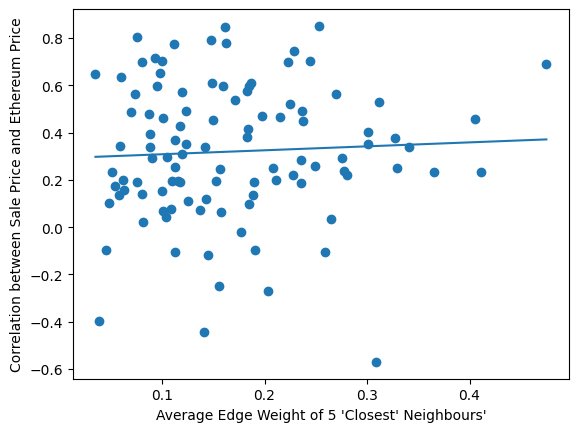

In [44]:
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel("Average Edge Weight of 5 'Closest' Neighbours'")
plt.ylabel("Correlation between Sale Price and Ethereum Price")
plt.scatter(x,y)
print(pearsonr(x,y))

In [ ]:
milady_data = list(collection_data.find({'slug':'milady','timestamp':{'$regex':'2022'}}))
# print(slug,len(milady_data))
milady_sale_prices = [x['total_price']*date_to_price[db_date_to_geck(x['timestamp'])] for x in milady_data if x['total_price']*date_to_price[db_date_to_geck(x['timestamp'])]<100000]
milady_eth_prices = [date_to_price[db_date_to_geck(x['timestamp'])] for x in milady_data if x['total_price']*date_to_price[db_date_to_geck(x['timestamp'])]<100000]

p = milady_eth_prices
q = milady_sale_prices
plt.plot(np.unique(p), np.poly1d(np.polyfit(p, q, 1))(np.unique(p)))
plt.scatter(p,q)
corr = pearsonr(p,q)
x.append(weight)
y.append(abs(corr.statistic))
print(corr.statistic)